In [208]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import itertools as it
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import joblib

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [210]:
print("Чтобы при использовании генераторов псевдослучайных чего бы то ни было, \nвообще говоря не обязательно последовательностей, у всех студентов были одинаковые данные,\nсостояния моделей, разбиения на на test и train, etc. - проще проверять")

Чтобы при использовании генераторов псевдослучайных чего бы то ни было, 
вообще говоря не обязательно последовательностей, у всех студентов были одинаковые данные,
состояния моделей, разбиения на на test и train, etc. - проще проверять


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [211]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [212]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [213]:
df_test.head(-5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Maruti Alto LXi,2007,95000,70000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
991,Honda Brio V MT,2012,376000,26000,Petrol,Individual,Manual,First Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0
992,Maruti Alto LXi,2006,85000,150000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
993,Maruti 800 DX,1999,52000,100000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [214]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [215]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [216]:
if len([True for i in df_train.count('columns') if i == df_train.shape[1]])!=df_train.shape[0]:
    print("Пропуски есть")

Пропуски есть


Пропуски есть в столбцах mileage, engine, max_power, torque, seats - подтверждается кодом ниже.

In [217]:
print(f"Пропуски есть в столбцах: {[col for col in df_train.columns if df_train.count('rows')[col] != df_train.shape[0]]}")

Пропуски есть в столбцах: ['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [218]:
print(f"Всего в датафрейме {sum(df_train.duplicated(subset=df_train.columns.difference(['selling_price'])))} объектов с одинаковым признаковым описанием")

Всего в датафрейме 1159 объектов с одинаковым признаковым описанием


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [219]:
df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)] # shape отличается т.к. с ключом  False входят все экземпляры дубликатов, в том числе и первые их вхождения

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [220]:
# чтобы число строк совпадало можно сделать так:
df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [221]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price'])) # значение по умолчанию для keep = 'first' - Drop duplicates except for the first occurrence - оставляет первое вхождение дубликата

In [222]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [223]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

В датасете есть ошибка/выброс - обработал неправильно заполненное число оборотов - раньше этот блок кода был в визуализации где я это и обнаружил
касательно выбросов - мне стало интересно и я нашел откуда взялись эти данные, очевидно гражданский дизельный мотор не может крутиться в 20 тысяч оборотов - ниже приведена запись - подтверждающая что ошибка была в исходных данных
ошибка скорее всего при заполнении данных - должно быть 190@2180 Nm@rpm
https://www.cardekho.com/overview/Tata_Sumo_Victa/Tata_Sumo_Victa_EX_TC.htm

In [226]:
df_train = df_train.copy() 
df_test = df_test.copy() 
# Создадим столбец
df_train['max_torque_rpm'] = np.nan
df_test['max_torque_rpm'] = np.nan


def prepare_df(df):
    for i, row in df.iterrows():
        if df.at[i,'max_power'] == ' bhp':
            df.at[i,'max_power'] = np.nan
        if df.at[i, 'mileage']is not np.nan:
            if 'kg' in df.at[i, 'mileage']:
                df.at[i,'mileage'] = float(re.findall(r'\d+.?\d*', df.at[i,'mileage'])[0].replace(',',''))*1.4
            else:
                df.at[i,'mileage'] = float(re.findall(r'\d+.?\d*', df.at[i,'mileage'])[0].replace(',',''))
    
        if df.at[i,'torque'] is np.nan:
            df.at[i,'max_torque_rpm'] = np.nan
        else:
            if re.findall(r'\d+?.\d+', df.at[i,'torque'])[-1].replace(',','')[-1] == '0' and float(re.findall(r'\d+?.\d+', df.at[i,'torque'])[-1].replace(',','')) > 10_000:
                df.at[i,'max_torque_rpm'] = float(re.findall(r'\d+?.\d+', df.at[i,'torque'])[-1].replace(',',''))/10 # есть ошибка в данных
            else:
                df.at[i,'max_torque_rpm'] = float(re.findall(r'\d+?.\d+', df.at[i,'torque'])[-1].replace(',',''))
            if 'kgm' in df.at[i,'torque'].lower() and 'nm' not in df.at[i,'torque'].lower() and float(re.findall(r'\d+?.\d*', df.at[i,'torque'])[0].strip('@').replace(',',''))  < 100:
                df.at[i,'torque'] = float(re.findall(r'\d+?.\d*', df.at[i,'torque'])[0].strip('@').replace(',',''))*9.80665
            else:
                df.at[i,'torque'] = float(re.findall(r'\d+?.\d*', df.at[i,'torque'])[0].strip('@').replace(',',''))
    df['engine'] = df['engine'].str.replace(r'(\d+) CC', r'\1', regex=True).astype(float)
    df['max_power'] = df['max_power'].str.replace(r'(\d+?.\d*) bhp', r'\1', regex=True)
    df['max_power'] = df['max_power'].str.replace(r'(\d+) ', r'\1', regex=True).astype(float)
    return df
    
df_train = prepare_df(df_train)
df_test = prepare_df(df_test)

In [227]:
df_train[df_train['torque'] > 700] # тоже очевидная ошибка - но тут ничего не попишешь, как на сайте: https://www.cardekho.com/overview/Maruti_Zen/Maruti_Zen_D.htm - нельзя исправить сохранив единообразие обработки

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
770,Maruti Zen D,2003,85000,120000,Diesel,Individual,Manual,Third Owner,20.8,1527.0,58.0,789.0,5.0,2250.0
3449,Maruti Zen D,2002,120000,60000,Diesel,Individual,Manual,Second Owner,20.8,1527.0,58.0,789.0,5.0,2250.0
3730,Maruti Zen D,2006,80000,110000,Diesel,Individual,Manual,Second Owner,20.8,1527.0,58.0,789.0,5.0,2250.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [228]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_train.mean())

print(f"Пропуски есть в столбцах: {[col for col in df_train.columns if df_train.count('rows')[col] != df_train.shape[0]]}")
print(f"Пропуски есть в столбцах: {[col for col in df_test.columns if df_test.count('rows')[col] != df_test.shape[0]]}")

Пропуски есть в столбцах: []
Пропуски есть в столбцах: []



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [229]:
print("Seats лучше сделать категориальной, поскольку количество мест в автомобиле нелинейно влияет на цену - за редким исключением бизнес-класса ('V-class, alphard'). \
Обычно минивэны или коммерческий транспорт стараются сделать более доступными, а двухместные спорткары или седаны S-класса гораздо дороже. Но и обратной зависимости нет, т.к. есть B-класс и дешевые купе. \
Разумно сравнивать цены на автомобили своей категории.")

Seats лучше сделать категориальной, поскольку количество мест в автомобиле нелинейно влияет на цену - за редким исключением бизнес-класса ('V-class, alphard'). Обычно минивэны или коммерческий транспорт стараются сделать более доступными, а двухместные спорткары или седаны S-класса гораздо дороже. Но и обратной зависимости нет, т.к. есть B-класс и дешевые купе. Разумно сравнивать цены на автомобили своей категории.


In [230]:
# преобразование столбцов engine и seats к int
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

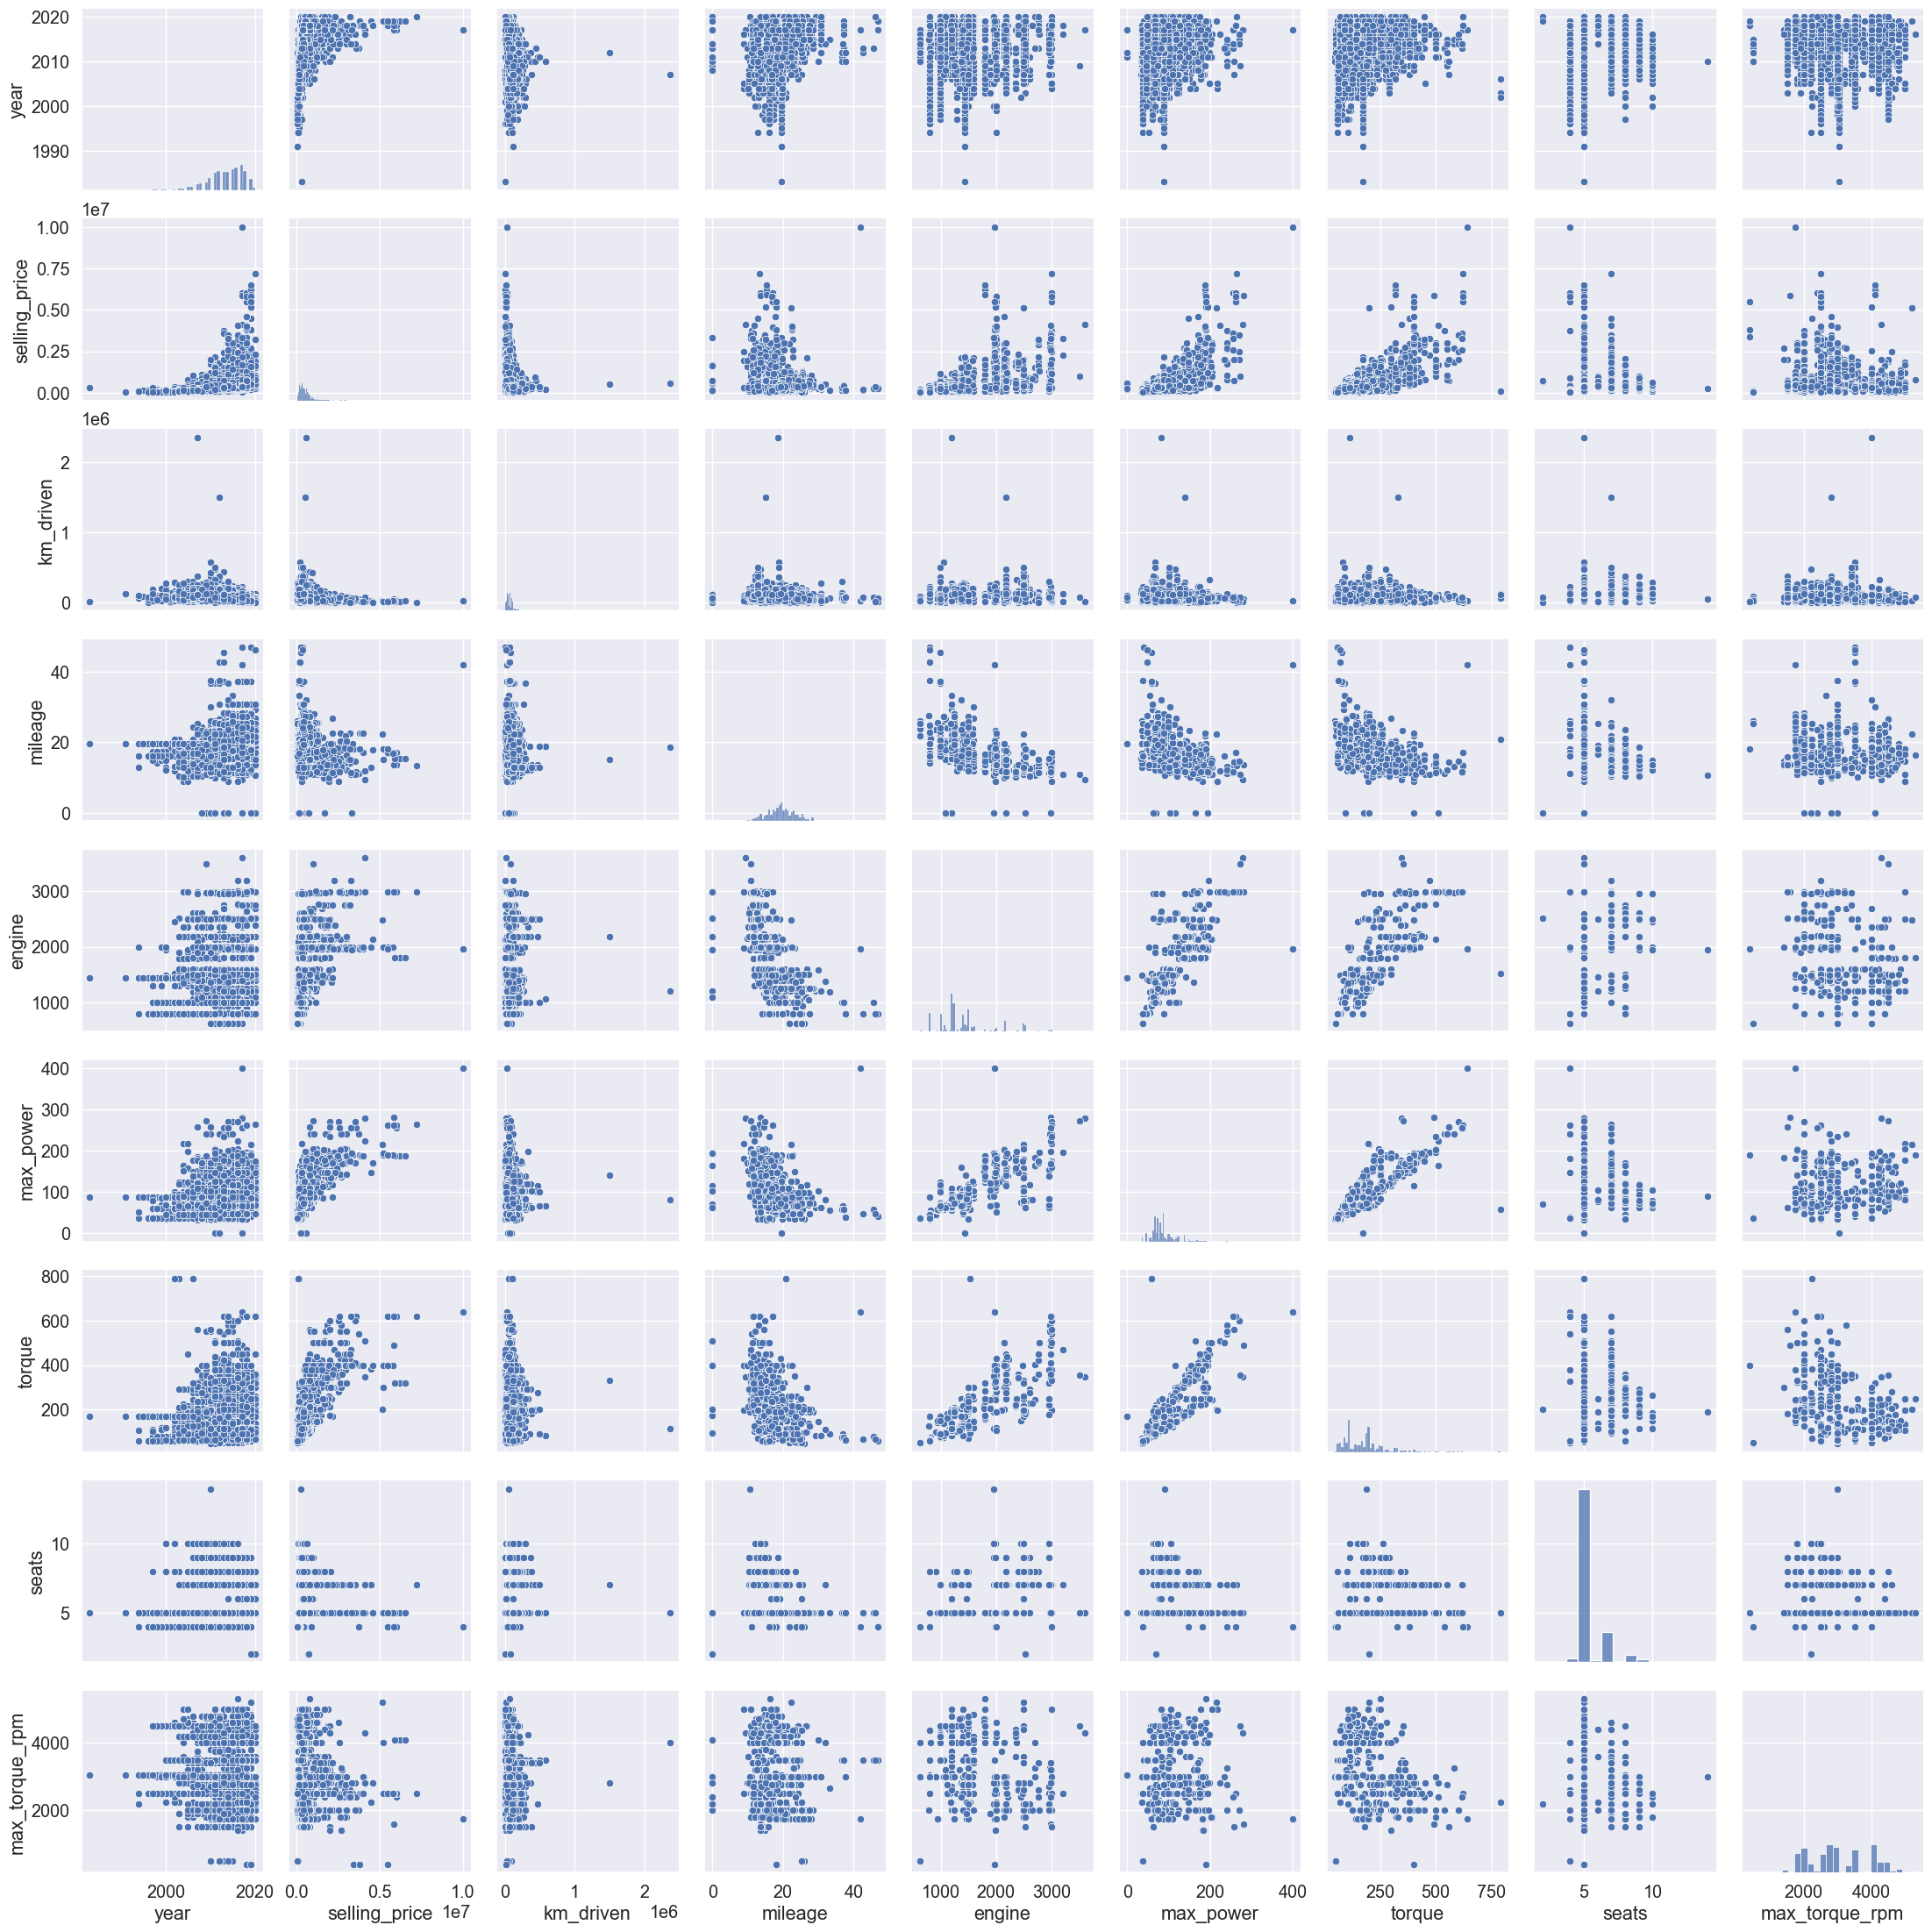

In [231]:
sns.pairplot(df_train, x_vars=df_train._get_numeric_data().columns, y_vars=df_train._get_numeric_data().columns)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Связь предикторов с целевой переменной кажется адекватной, есть выбросы, но в целом, зависимости соответствуют существющей тенденции - новые машины дороже, машины с большим пробегом дешевле, объем двигателя, число мест и крутящий момент нелинейно влияют на цену и т.д. Присутствуют линейные и квадратичные, а также обратные зависимости

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

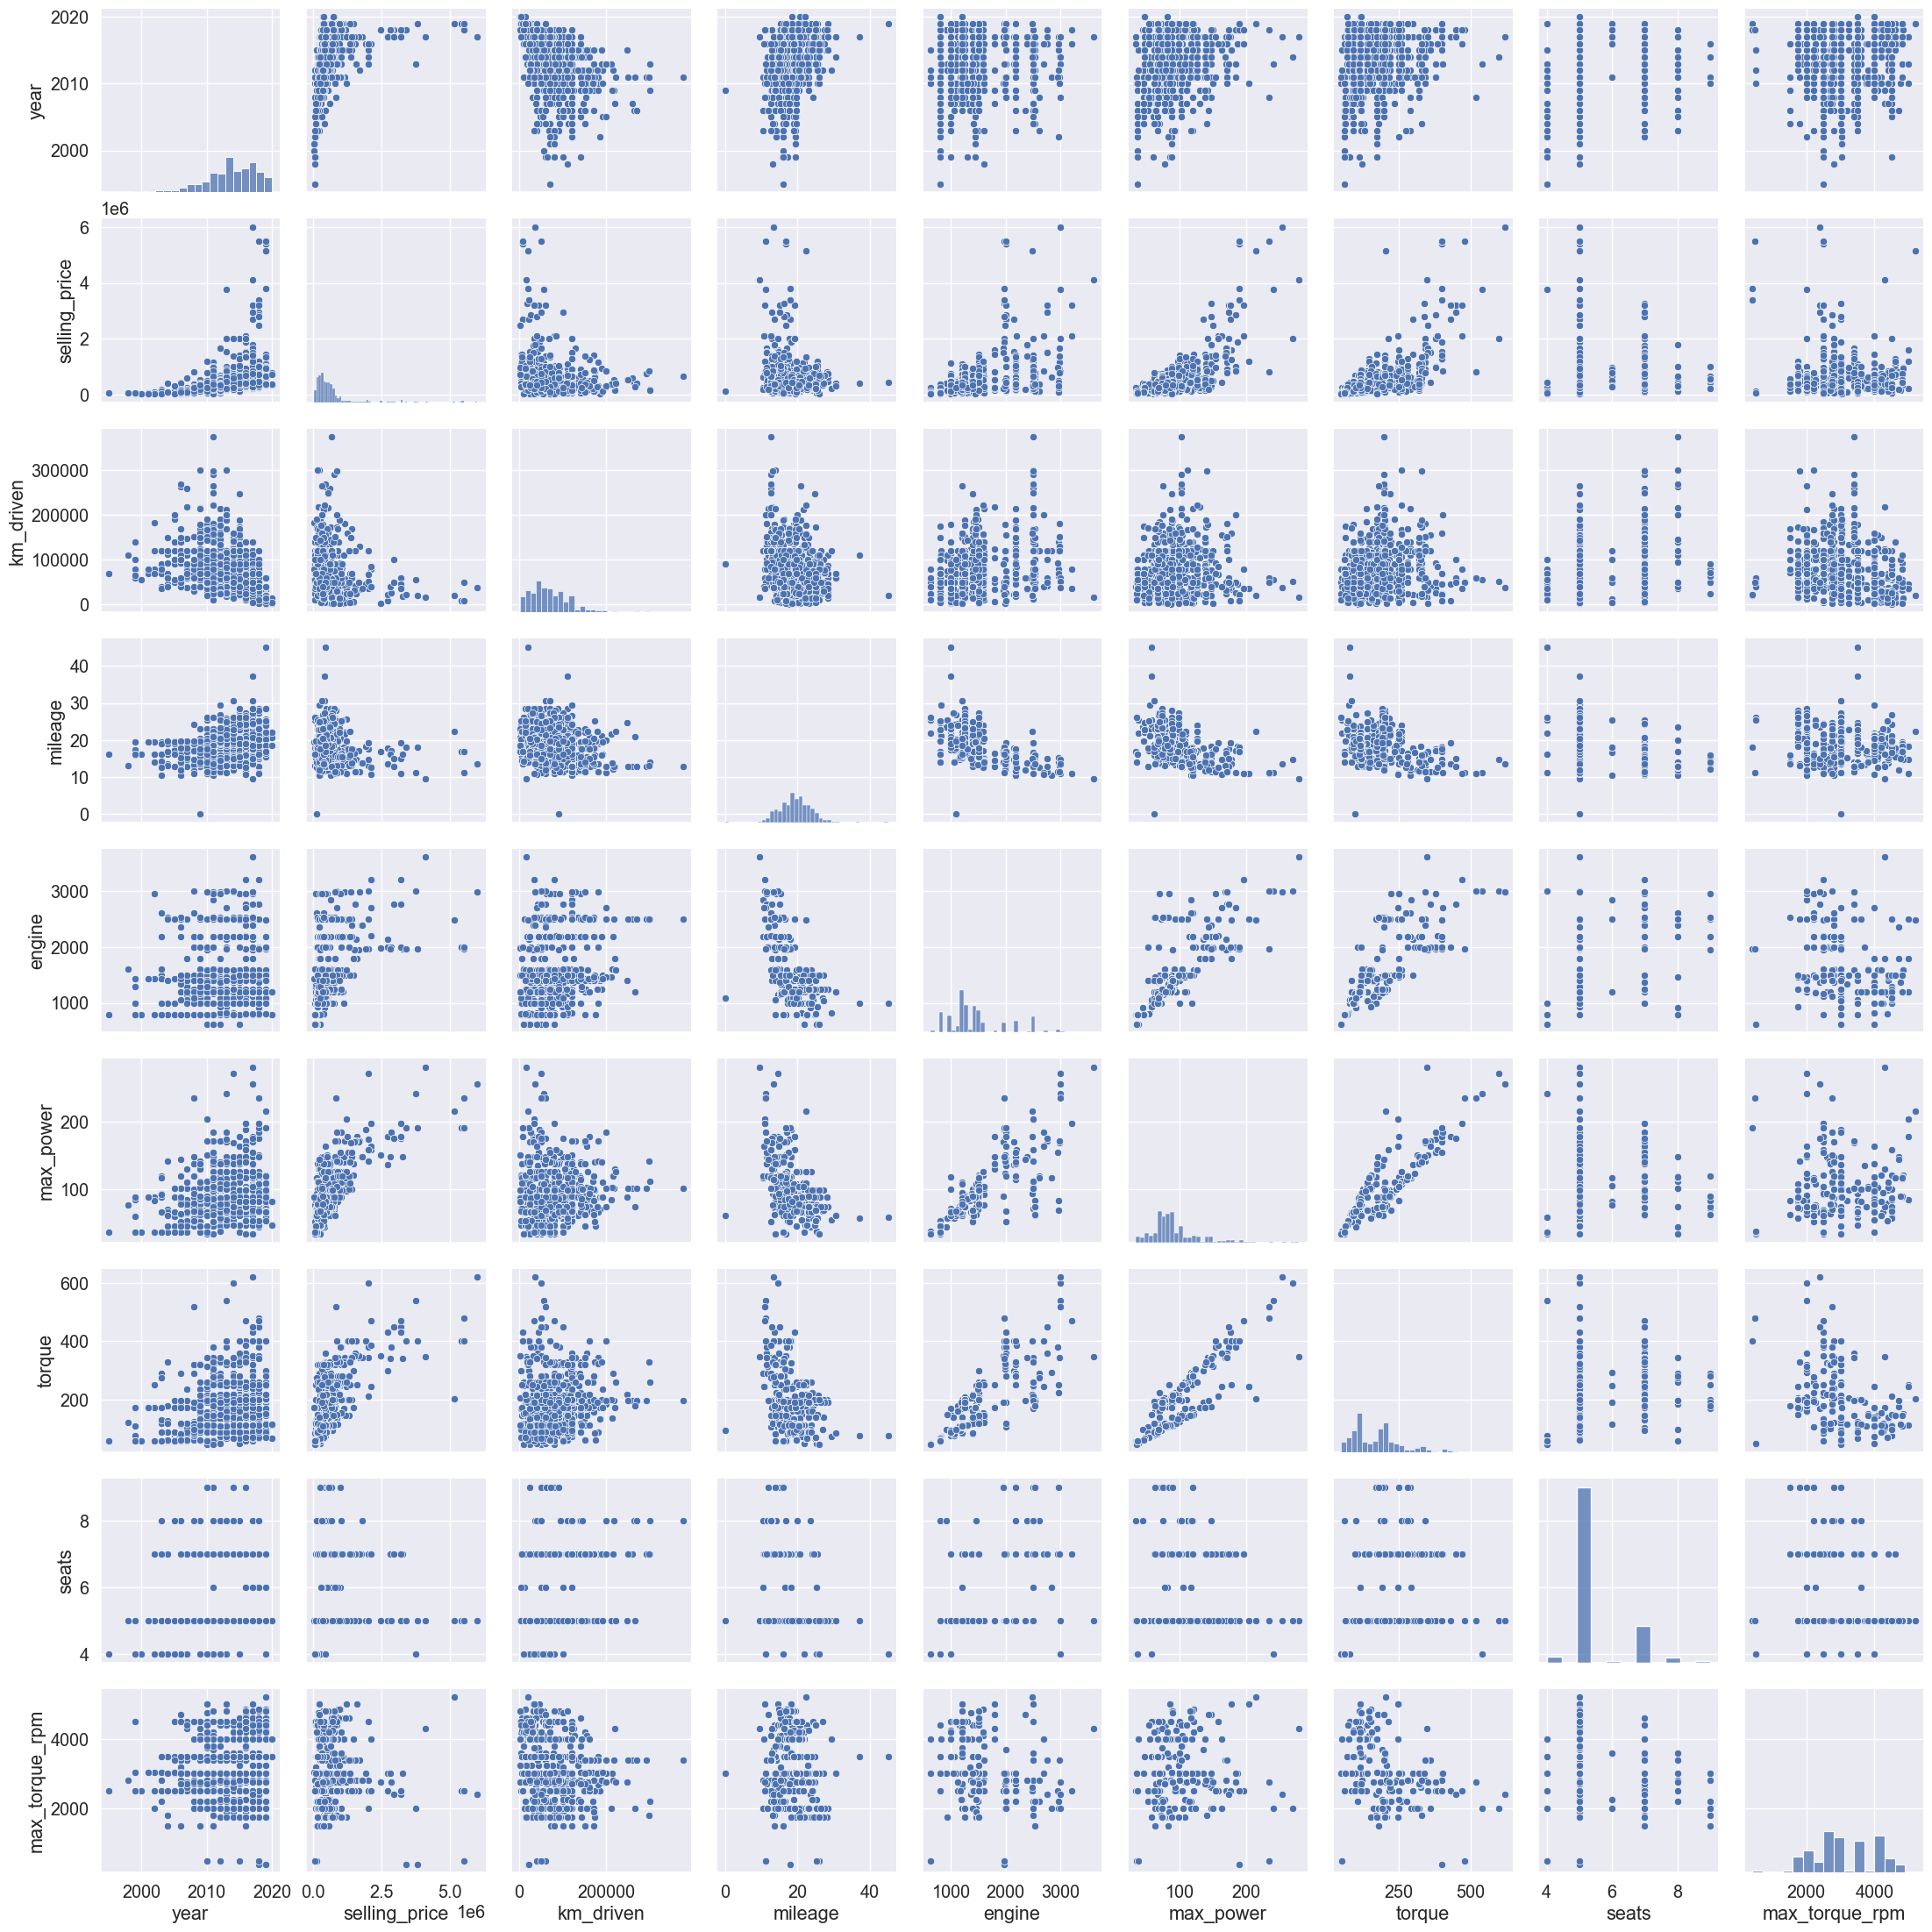

In [232]:
sns.pairplot(df_test, x_vars=df_test._get_numeric_data().columns, y_vars=df_test._get_numeric_data().columns)

Данные не идентичны, например, в тестовых данных есть машина с 14 местами, но формы попарных распределений выглядят очень похожими, поэтому можно сказать что совокупности оказались похожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

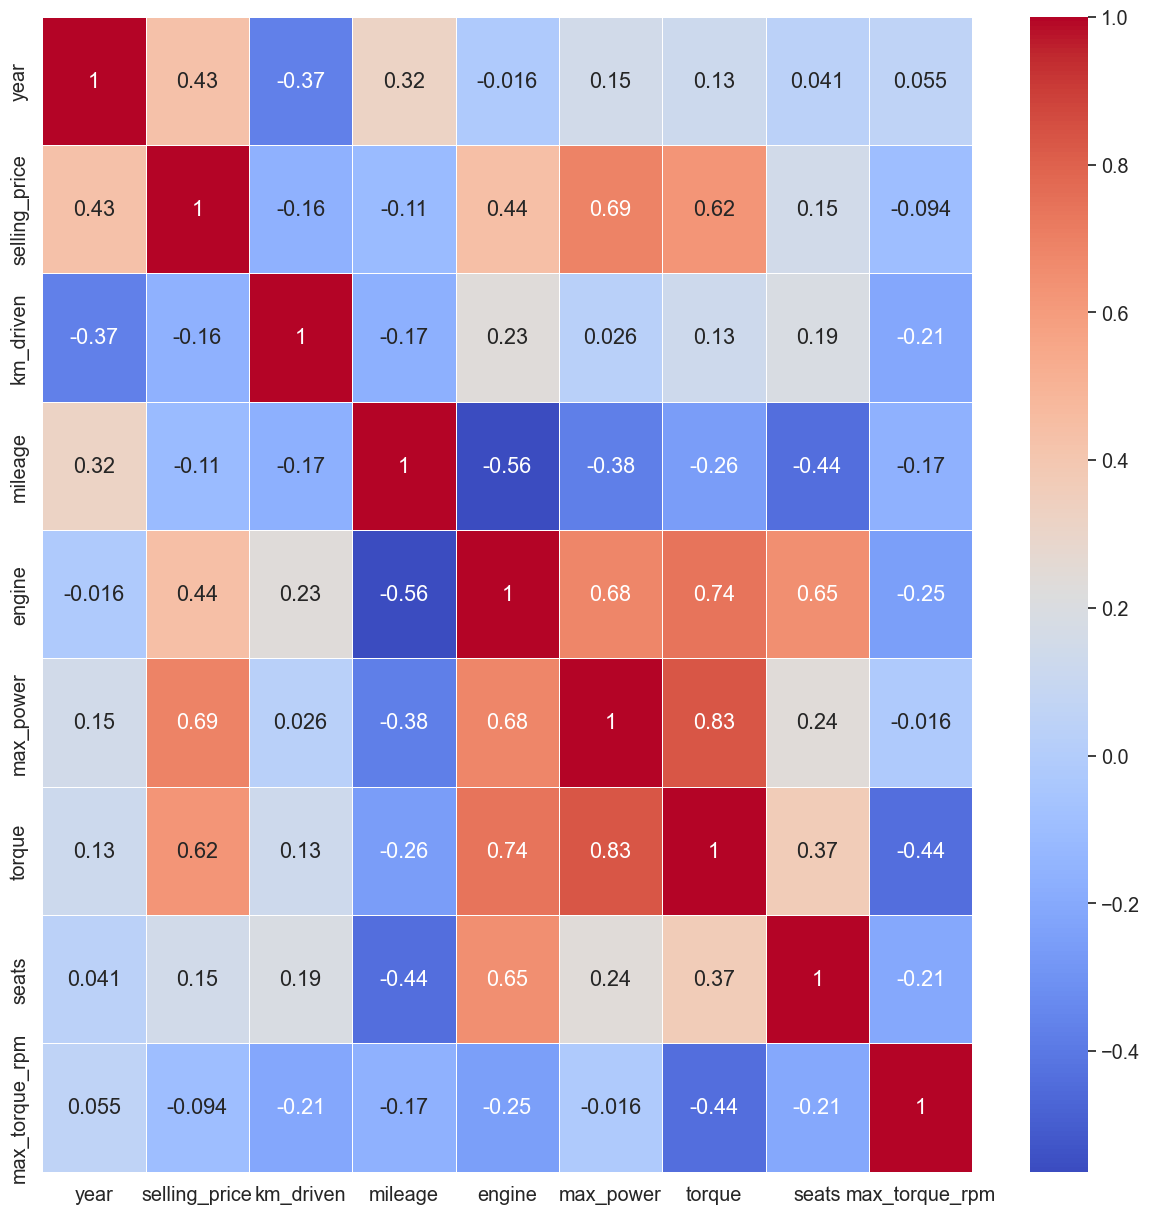

In [233]:
df_num = df_train[list(df_train._get_numeric_data().columns)].copy()
df_num.head()
corr = df_num.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, linewidths=.5, annot=True, ax=ax, cmap='coolwarm')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Какие 2 признака наименее скоррелированы между собой? - Если под наименьшей скоррелированностью понимать 0 значение корреляции, то есть по модулю, то: 0.016 - имеют пары engine<-> year и max_torque_rpm<->max_power. Если учитывать знак, то: -0.57 engine<->mileage - что логично, большой двигатель расходует в среднем больше топлива и -0.44 seats<-> mileage, torque<->max_torque_rpm.
* Между какими наблюдается довольно сильная положительная линейная зависимость? - Между max_power и torque - подтверждается значением корреляции - наибольшая в матрице - 0.83 и распределением на графике. Также стоит отметить положительную линейную зависимость между: engine и max_power, selling_price и max_power, selling_price и year - хотя она скорее квадратичная. (Обратная линейная зависимость между engine и mileage)
* Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. - Скорее да, их корреляция отрицательная, следовательно при уменьшении года километраж растет. Но вообще говоря зависимость не линейная, а больше напоминает нормальное распределение с матожиданием в районе 2010. Соответственно, если год меньше этих значений, то будет наоборот положительная зависимость. Но если год убывает от 2022 к 2010 то да, можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

(0.25 балла) <font color='#9933CC'> Отобразите диаграмму рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'torque in Nm')

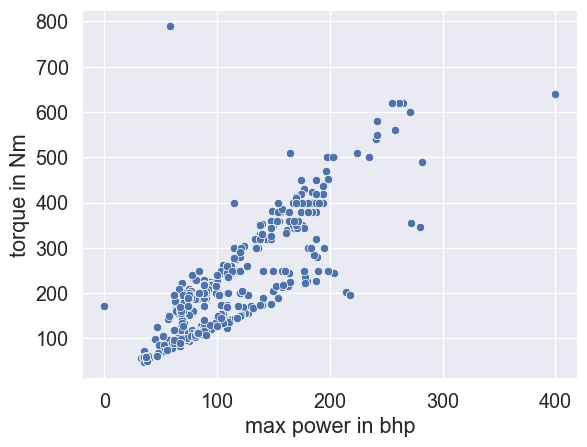

In [234]:
# your code here
sns.set(font_scale=1.3)
sns.scatterplot(
    x='max_power', 
    y='torque', 
    data=df_train)
plt.xlabel(
    'max power in bhp')
plt.ylabel(
    'torque in Nm')

Text(0, 0.5, 'engine in CC')

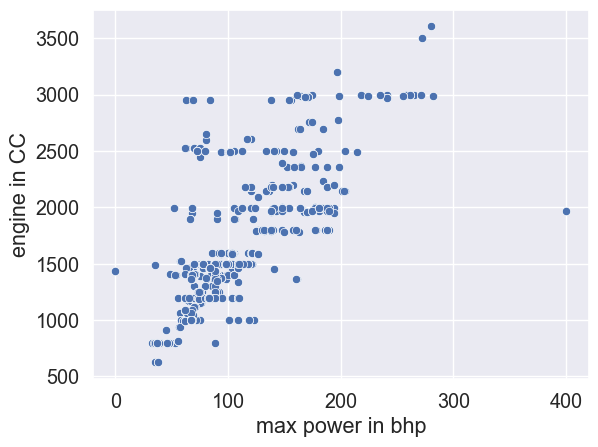

In [235]:
# your code here поскольку подразумевалось что torque - отсутствует во фрейме,
# то также изобразим следующую по величине скоррелированности пару
sns.set(font_scale=1.3)
sns.scatterplot(
    x='max_power', 
    y='engine', 
    data=df_train)
plt.xlabel(
    'max power in bhp')
plt.ylabel(
    'engine in CC')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Text(0, 0.5, 'selling price')

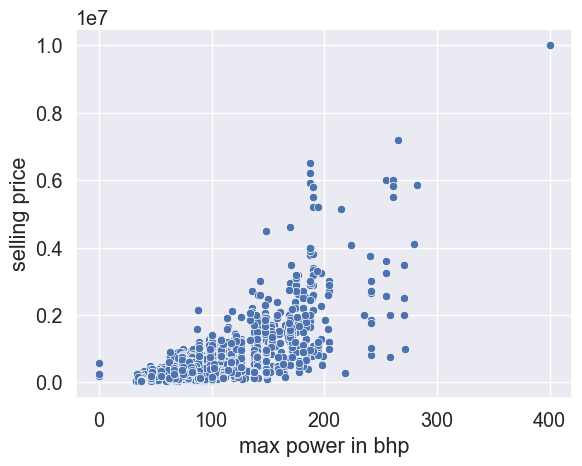

In [236]:
# стоит отметить что selling и max_power почти линейно зависят, а нас в первую очередь интересует целевая переменная
sns.set(font_scale=1.3)
sns.scatterplot(
    x='max_power', 
    y='selling_price', 
    data=df_train)
plt.xlabel(
    'max power in bhp')
plt.ylabel(
    'selling price')

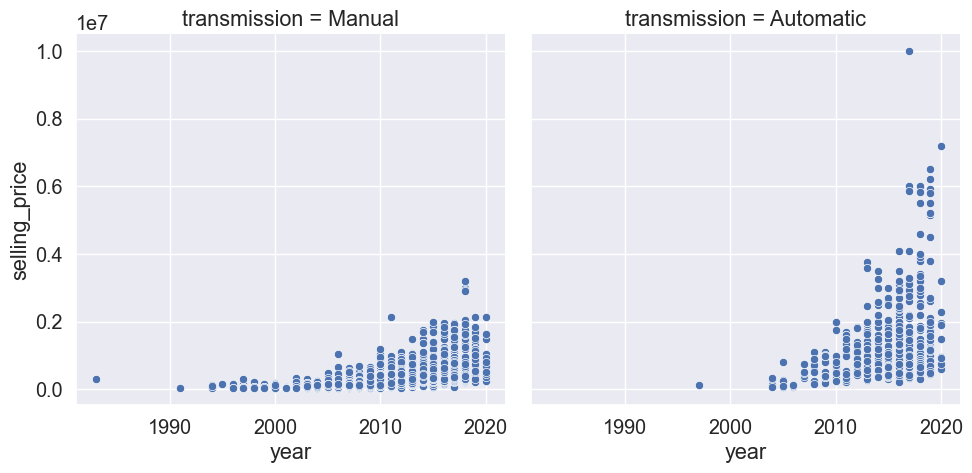

In [237]:
# совсем не рассмотрены категориальные фичи:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=df_train, 
    kind='scatter', 
    col='transmission'); # наиболее дорогие машины имеют АКПП и в самом дешевом сегменте практически не представлены

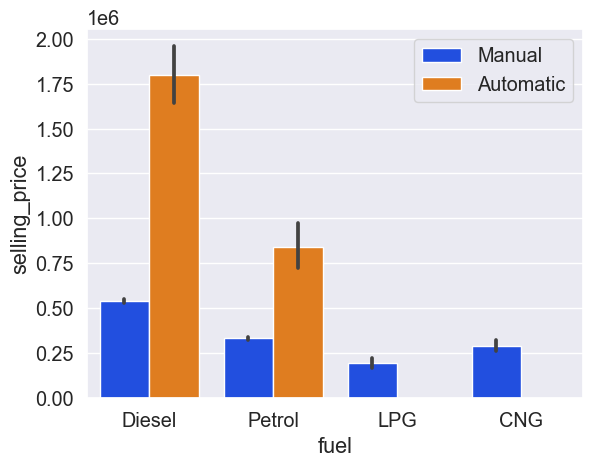

In [238]:
sns.barplot(
    x='fuel', 
    y='selling_price', 
    data=df_train, 
    palette='bright',
    hue='transmission');# наиболее дорогие машины имеют АКПП и дизельный двигатель. В самом дешевом сегменте предствалены машины на видах газового топлива практически не представлены авто с АКПП
plt.legend(loc='upper right')

<AxesSubplot:xlabel='year', ylabel='mileage'>

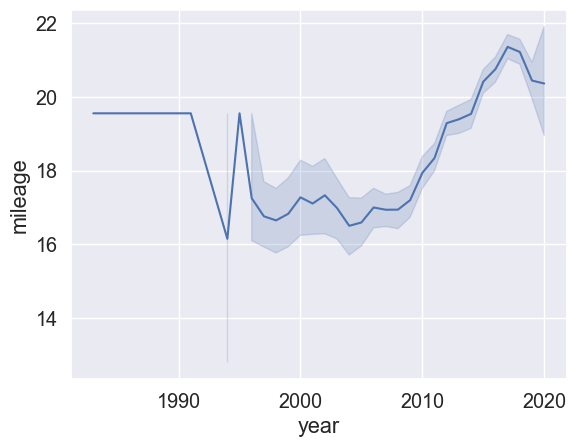

In [239]:
sns.lineplot( x="year", y="mileage", data=df_train) # график иллюстрирующий мой ответ касательно зависимости year и mileage

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

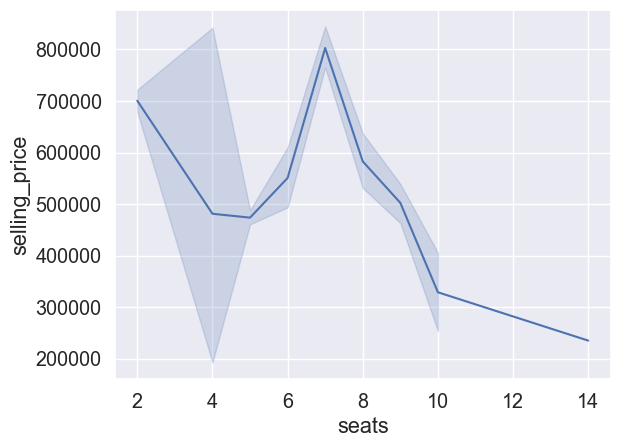

In [240]:
sns.lineplot( x="seats" ,y="selling_price", data=df_train) # можно пройтись по значениям seats: дорогие купе, дешевые хэтчбеки и седаны, дорогие 6-7 местные внедорожники, чуть менее дорогие минивэны и дешевый коммерческий транспорт.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [241]:
y_train = df_train['selling_price']
copy_cols = list(df_train._get_numeric_data().columns)
copy_cols.remove("selling_price")
copy_cols.remove('max_torque_rpm')
copy_cols.remove('torque')
X_train = df_train[copy_cols].copy()
X_train.head()

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


In [242]:
assert X_train.shape == (5840, 6)

In [243]:
y_test = df_test['selling_price']
copy_cols = list(df_test._get_numeric_data().columns)
copy_cols.remove("selling_price")
copy_cols.remove('max_torque_rpm')
copy_cols.remove('torque')
X_test = df_test[copy_cols].copy()
X_test.head()

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.0,2498,112.0,7
1,2017,25000,21.5,1497,108.5,5
2,2007,218463,12.9,1799,130.0,5
3,2015,173000,25.1,1498,98.6,5
4,2011,70000,16.5,1172,65.0,5


In [244]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе ~непонятно, как ~понять, насколько успешны наши эксперименты.

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE

model = LinearRegression()
model.fit(X_train, y_train)

print("r2 score:")
print(r2_score(y_train, model.predict(X_train)))
print(r2_score(y_test, model.predict(X_test)))

print("MSE:")
print(MSE(y_train, model.predict(X_train)))
print(MSE(y_test, model.predict(X_test)))

r2 score:
0.5921547456377113
0.5939575077511743
MSE:
116904086017.55602
233404819347.22668


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [246]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_tr_std = scaler.fit_transform(X_train)
X_tt_std = scaler.transform(X_test)

model_n = LinearRegression()
model_n.fit(X_tr_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_n.predict(X_tr_std)))
print(r2_score(y_test, model_n.predict(X_tt_std)))

print("MSE:")
print(MSE(y_train, model_n.predict(X_tr_std)))
print(MSE(y_test, model_n.predict(X_tt_std))) 

r2 score:
0.5921547456377123
0.5939575077511945
MSE:
116904086017.55574
233404819347.2151


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [247]:
# your code here
print(model.coef_)
print(model_n.coef_)
print("Обе модели показывают что наибольшие веса у признаков 1 и 5 - это year и max_power")

[ 3.87267271e+04 -7.21748926e-01  6.40544876e+03  1.25518939e+02
  1.01681511e+04 -2.36036962e+04]
[158596.45309973 -43352.56610783  27081.23443791  60814.52964807
 321505.83243946 -23184.96285853]
Обе модели показывают что наибольшие веса у признаков 1 и 5 - это year и max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [248]:
from sklearn.linear_model import Lasso

# your code here
model_L = Lasso()
model_L.fit(X_tr_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_L.predict(X_tr_std)))
print(r2_score(y_test, model_L.predict(X_tt_std)))

print("MSE:")
print(MSE(y_train, model_L.predict(X_tr_std)))
print(MSE(y_test, model_L.predict(X_tt_std)))

print("MAE:")
print(MAE(y_train, model_L.predict(X_tr_std)))
print(MAE(y_test, model_L.predict(X_tt_std)))

r2 score:
0.5921547456030511
0.5939563323623194
MSE:
116904086027.49095
233405494994.3045
MAE:
184874.54194022025
224830.06397170565


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [249]:
# your code here
print(model_L.coef_)
print("L1-регуляризация с параметрами по умолчанию веса не занулила, потому что нельзя сказать что какие-либо из признаков присутствующих в X_train незначимы при регуляризации с дефолтным параметром альфа.")

[158596.06087215 -43351.48334604  27079.50954716  60809.80836196
 321506.72017406 -23182.06310497]
L1-регуляризация с параметрами по умолчанию веса не занулила, потому что нельзя сказать что какие-либо из признаков присутствующих в X_train незначимы при регуляризации с дефолтным параметром альфа.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Если считать по различным коэффициентам моделей - то столько -сколько я передаю в линспейсе - везде ставил 1000, на всякий случай выводится в принте после работы функций, если считать сколько фактически было обучений, то нужно умножить на 10, т.к. берем 10 фолдов - вариантов выбрать 1 обучающий из 10 ровно 10, соответственно ответ 10_000.
Два блока кода используют разные скоринги при обучении, потому что у одного из них получаются нулевые веса модели, а у другого лучшие значения скорингов.
Коэффициенты и нули описаны в принте, вообще ответ - да, занулились.

In [250]:
%%time
alphas = np.linspace(-100_000, 100_000, num=1000)
scoring = 'neg_mean_squared_error'
n_folds
gscv = GridSearchCV(estimator=Lasso(), param_grid={"alpha": alphas}, cv=n_folds, scoring=scoring)
gscv.fit(X_tr_std, y_train)
print(gscv.best_estimator_)

model_La = Lasso(alpha=gscv.best_params_['alpha'])
model_La.fit(X_tr_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_La.predict(X_tr_std)))
print(r2_score(y_test, model_La.predict(X_tt_std)))

print("MSE:")
print(MSE(y_train, model_La.predict(X_tr_std)))
print(MSE(y_test, model_La.predict(X_tt_std)))

print("MAE:")
print(MAE(y_train, model_La.predict(X_tr_std)))
print(MAE(y_test, model_La.predict(X_tt_std)))

print(f"Используемый scoring: {scoring}", f"Грид-сёрчу пришлось обучать моделей:{len(alphas)*n_folds}", f"Лучший коэффициент: {gscv.best_params_['alpha']}",
      f"При этом коэффициенте занулилось весов: {list(model_La.coef_).count(0)} ",sep='\n')

Lasso(alpha=1101.1011011011142)
r2 score:
0.5921131099538417
0.5926461139267191
MSE:
116916020400.79678
234158645965.2115
MAE:
184464.9653313369
224624.28687748712
Используемый scoring: neg_mean_squared_error
Грид-сёрчу пришлось обучать моделей:10000
Лучший коэффициент: 1101.1011011011142
При этом коэффициенте занулилось весов: 0 
CPU times: total: 7min 40s
Wall time: 2min 33s


In [251]:
%%time
alphas = np.linspace(-100_000, 100_000, num=1000)
scoring = 'r2'
n_folds = 10
gscv = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alphas}, cv=n_folds, refit=False, scoring=scoring)
gscv.fit(X_tr_std, y_train)
print(gscv.best_params_)

model_La = Lasso(alpha=gscv.best_params_['alpha'])
model_La.fit(X_tr_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_La.predict(X_tr_std)))
print(r2_score(y_test, model_La.predict(X_tt_std)))

print("MSE:")
print(MSE(y_train, model_La.predict(X_tr_std)))
print(MSE(y_test, model_La.predict(X_tt_std)))

print("MAE:")
print(MAE(y_train, model_La.predict(X_tr_std)))
print(MAE(y_test, model_La.predict(X_tt_std)))

print(f"Используемый scoring: {scoring}", f"Грид-сёрчу пришлось обучать моделей:{len(alphas)*n_folds}", f"Лучший коэффициент: {gscv.best_params_['alpha']}",
      f"При этом коэффициенте занулилось весов: {list(model_La.coef_).count(0)} : {model_La.coef_}",sep='\n')

{'alpha': 26526.526526526533}
r2 score:
0.5825030595089165
0.5643601377367563
MSE:
119670629291.86563
250418232803.31122
MAE:
180995.37764737662
224230.08655567747
Используемый scoring: r2
Грид-сёрчу пришлось обучать моделей:10000
Лучший коэффициент: 26526.526526526533
При этом коэффициенте занулилось весов: 3 
CPU times: total: 7min 59s
Wall time: 2min 39s


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [252]:
from sklearn.linear_model import ElasticNet

alphas = np.linspace(0, 4, num=100)
l1 = np.linspace(0, 1, num=100)
n_folds=10
gscv2 = GridSearchCV(model_EN, param_grid={"alpha": alphas, "l1_ratio": l1}, cv=n_folds)
gscv2.fit(X_tr_std, y_train)
print(gscv2.best_estimator_)
model_ENa = ElasticNet(alpha=gscv2.best_params_['alpha'], l1_ratio=gscv2.best_params_['l1_ratio'])
model_ENa.fit(X_tr_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_ENa.predict(X_tr_std)))
print(r2_score(y_test, model_ENa.predict(X_tt_std)))

print("MSE:")
print(MSE(y_train, model_ENa.predict(X_tr_std)))
print(MSE(y_test, model_ENa.predict(X_tt_std)))

print("MAE:")
print(MAE(y_train, model_ENa.predict(X_tr_std)))
print(MAE(y_test, model_ENa.predict(X_tt_std)))
print(f"Грид-сёрчу пришлось обучать моделей:{len(alphas)*len(l1)*n_folds}", f"Лучший коэффициент: {gscv2.best_params_}"
      ,sep='\n')

ElasticNet(alpha=3.5151515151515156, l1_ratio=0.9595959595959597)
r2 score:
0.5850485869530431
0.5630696566529159
MSE:
118940983535.03677
251160038180.814
MAE:
175141.0680683971
219144.14501823645
Грид-сёрчу пришлось обучать моделей:100000
Лучший коэффициент: {'alpha': 3.5151515151515156, 'l1_ratio': 0.9595959595959597}


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Лучший коэффициент гиперпараметра для ElasticNet = 100.1001001001132 и ElasticNet в принципе не обнуляет веса

Предлагаем вам оставить ~вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [253]:
# your code here
X_train_cat = df_train.drop(['selling_price', 'name','torque','max_torque_rpm'], axis=1)
X_train_cat.head()
X_tt_cat = df_test.drop(['selling_price', 'name','torque','max_torque_rpm'], axis=1)
print(X_train_cat.shape)
print(X_tt_cat.shape)

(5840, 10)
(1000, 10)


In [254]:
assert X_train_cat.shape == (5840, 10)

In [255]:
X_train_cat.seats = X_train_cat.seats.astype(object)
X_tt_cat.seats=X_tt_cat.seats.astype(object)
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [256]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
# your code here
X_dum = pd.get_dummies(X_train_cat, drop_first=True)
X_tt_dum = pd.get_dummies(X_tt_cat, drop_first=True)

delta_cols = set(X_dum.columns) - set(X_tt_dum.columns)
if X_dum.shape[1] > X_tt_dum.shape[1]:
    for col in delta_cols:
        X_tt_dum[col] = 0
else:
    for col in delta_cols:
        X_dum[col] = 0
X_tt_dum = X_tt_dum.reindex(columns = X_dum.columns, fill_value=0)
print(f"Признаки на тесте и трейне одинаковы: {X_dum.columns==X_tt_dum.columns}")

scaler = StandardScaler()
X_dum_std = scaler.fit_transform(X_dum)
X_tt_dum_std = scaler.transform(X_tt_dum)


Признаки на тесте и трейне одинаковы: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
<class 'pandas.core.frame.DataFrame'>


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [257]:
%%time
scoring = 'r2'
alphas = np.linspace(0, 1000, num=10_000)
n_folds = 10
gscv3 = GridSearchCV(estimator=Ridge(), param_grid={"alpha": alphas}, cv=10, scoring=scoring)
gscv3.fit(X_dum_std, y_train)
print(gscv3.best_estimator_)

model_r = Ridge(alpha=gscv3.best_params_['alpha'])
model_r.fit(X_dum_std, y_train)

print("r2 score:")
print(r2_score(y_train, model_r.predict(X_dum_std)))
print(r2_score(y_test, model_r.predict(X_tt_dum_std)))

print("MSE:")
print(MSE(y_train, model_r.predict(X_dum_std)))
print(MSE(y_test, model_r.predict(X_tt_dum_std)))

print("MAE:")
print(MAE(y_train, model_r.predict(X_dum_std)))
print(MAE(y_test, model_r.predict(X_tt_dum_std)))

print(f"Используемый scoring: {scoring}", f"Грид-сёрчу пришлось обучать моделей:{len(alphas)*n_folds}", f"Лучший коэффициент: {gscv3.best_params_['alpha']}",
      f"При этом коэффициенте занулилось весов: {list(model_r.coef_).count(0)} ",sep='\n')

Ridge(alpha=608.6608660866086)
r2 score:
0.6631763054034386
0.6073337076822483
MSE:
96546584138.7226
225715797660.91638
MAE:
167010.7340818986
216723.63333665795
Используемый scoring: r2
Грид-сёрчу пришлось обучать моделей:100000
Лучший коэффициент: 608.6608660866086
При этом коэффициенте занулилось весов: 0 
CPU times: total: 35min 43s
Wall time: 4min 32s


Ridge() использует L2 регрессию и веса не зануляет.
Качество предсказаний улучшить удалось. 0.66 в сравнении с лучшим выше - 0.59 - на тесте и на трейне - 0.60 против 0.59

In [267]:
import pickle
pkl_filename = "pickle_model.pkl" 
with open(pkl_filename, 'wb') as file: 
    pickle.dump(model_r, file) 

joblib.dump(df_train.mean(), 'mean.pkl')


['mean.pkl']

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [259]:
# your code here
# 0.4 добавить квадрат года
# сделать признак число владельцев
# кажется, что посчитать число "лошадей" на литр объема может быть полезно

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [260]:
model_r = Ridge(alpha=gscv3.best_params_['alpha'])
model_r.fit(X_dum_std, y_train)


def business_metrics(y_true, y_pred):
    # your code here
    # доля измеряется от 0 до 1, поэтому вывод без знаков процента и т.п.
    #return sum([True for i in range(len(y_true)) if abs(np.array(y_pred)[i]-np.array(y_true)[i])<=(0.1*np.array(y_true)[i])]) / len(y_true)
    return len([True for i in range(len(y_true)) if (0.9*np.array(y_true)[i])<=abs(np.array(y_pred)[i])<=(1.1*np.array(y_true)[i])]) / len(y_true)
print(business_metrics(y_test, model_r.predict(X_tt_dum_std))) 

0.262


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [58]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядеть проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link